In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_csv('experiment1/metrics.csv')
df = pd.read_csv('metrics/ring_S_metrics.csv')
#df['size'] = df['Setting'].apply(lambda x: str(x[42]) + str(x[53]))
#df = df[df['size'] == '32']
df['Setting'] = df['Setting'].apply(lambda x: x.replace('-major_weight-1', ''))
df

,Setting,Seed,Modes,Major-Modes,Minor-Modes,HQS,Real-KL,Real-RKL,Real-JSD,Real-TVD,Uniform-KL,Uniform-RKL,Uniform-JSD,Uniform-TVD
0,-dataset-polar-d_layers-4-g_layers-4-d_alpha-1...,3,0,0.0,0.0,0.00000,6.781676,2.076327,0.495679,0.874720,6.781676,2.076327,0.495679,0.874720
1,-dataset-polar-d_layers-4-g_layers-4-d_alpha-1...,2,8,8.0,0.0,0.98532,0.018775,0.018726,0.004673,0.083453,0.018775,0.018726,0.004673,0.083453
2,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,2,8,8.0,0.0,0.82280,0.006027,0.005756,0.001470,0.039947,0.006027,0.005756,0.001470,0.039947
3,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,2,8,8.0,0.0,0.98384,0.007764,0.007664,0.001926,0.054223,0.007764,0.007664,0.001926,0.054223
4,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,2,0,0.0,0.0,0.00000,5.737985,1.555637,0.398123,0.749760,5.737985,1.555637,0.398123,0.749760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,199,8,8.0,0.0,0.98368,0.004078,0.004169,0.001030,0.028631,0.004078,0.004169,0.001030,0.028631
5394,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,200,6,6.0,0.0,0.97128,1.252293,0.285986,0.091763,0.246481,1.252293,0.285986,0.091763,0.246481
5395,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,200,7,7.0,0.0,0.88540,1.178694,0.337311,0.100865,0.337732,1.178694,0.337311,0.100865,0.337732
5396,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,200,4,4.0,0.0,0.98548,3.679491,0.696151,0.215819,0.499840,3.679491,0.696151,0.215819,0.499840


In [13]:
types = ['Modes', 'Minor-Modes', 'HQS', 'Uniform-RKL', 'Reverse KL', 'JSD', 'TVD']
index = 0
rows = 1
means = df.groupby('Setting')[types[index]].mean().values.reshape(-1, rows).transpose().tolist()
stds = df.groupby('Setting')[types[index]].std().values.reshape(-1, rows).transpose().tolist()

indices = df.groupby('Setting')[types[index]].mean().index.values.reshape(-1, rows).transpose().tolist()
indices

[['-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.2-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.3-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.4-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.5-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.5-g_alpha-1.1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.5-g_alpha-1.2-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.6-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.6-g_alpha-1.1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.6-g_alpha-1.2-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.7-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.7-g_alpha-1.1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.7-g_alpha-1.2-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-

In [15]:
count8s = df[df['Modes'] == 0].groupby('Setting')[types[index]].size().transpose()
sizes = df.groupby('Setting')[types[index]].size().transpose()

(count8s / sizes).tolist()

[0.035,
 0.02,
 0.055,
 0.045,
 0.07333333333333333,
 0.08666666666666667,
 0.045,
 0.08666666666666667,
 0.05333333333333334,
 0.06532663316582915,
 0.12666666666666668,
 0.08666666666666667,
 0.08040201005025126,
 0.12,
 0.12,
 0.16,
 0.13333333333333333,
 0.17333333333333334,
 0.295,
 0.26,
 0.31333333333333335]

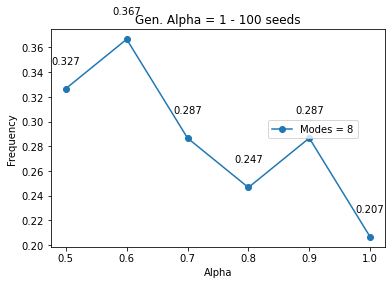

In [23]:
idx = [0,2,4,6,8,10]
#count0s = df[df['Modes'] == 0].groupby('Setting')[types[index]].size().transpose()[idx]
count8s = df[df['Modes'] == 8].groupby('Setting')[types[index]].size().transpose()[idx]
sizes = df.groupby('Setting')[types[index]].size().transpose()[idx]

#p0 = np.array((count0s / sizes).tolist())

#p0[np.isnan(p0)] = 0

p8 = np.array((count8s / sizes).tolist())
#pX = 1 - p0 - p8

alphas = [0.5,0.6,0.7,0.8,0.9,1]

#plt.plot(alphas, p0, marker='o', label='Modes = 0')

#for x,y in zip(alphas, p0):
    #plt.text(x, y+0.02, str(round(y * 1000) / 1000), ha='center')

plt.plot(alphas, p8, marker='o', label='Modes = 8')

for x,y in zip(alphas, p8):
    plt.text(x, y+0.02, str(round(y * 1000) / 1000), ha='center')
    
#plt.plot(alphas, pX, marker='o', label=r'Modes $\in$ (0,8)')

#for x,y in zip(alphas, pX):
    #plt.text(x, y+0.02, str(round(y * 1000) / 1000), ha='center')
    
plt.ylabel('Frequency')
plt.xlabel('Alpha')
plt.title('Gen. Alpha = 1 - 100 seeds')
plt.legend(loc=(0.65,0.5))
plt.show()

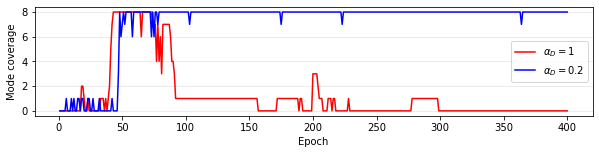

In [5]:
epochs = list(range(1,401))

seed8_vanilla = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 5, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 4, 7, 4, 6, 3, 7, 7, 7, 7, 7, 7, 6, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
seed8_alpha = [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 8, 6, 7, 8, 7, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

plt.figure(figsize=(10,2))

plt.plot(epochs, seed8_vanilla, color='red', label=r'$\alpha_{D} = 1$')
plt.plot(epochs, seed8_alpha, color='blue', label=r'$\alpha_{D} = 0.2$')

plt.grid(axis='y', color=(0.9,0.9,0.9))
plt.ylabel('Mode coverage')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.show()

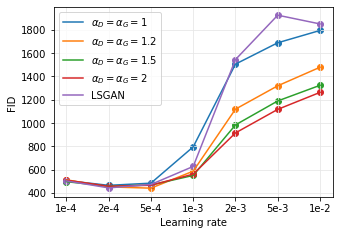

In [16]:
index = 1
metric = ['Modes', 'FIDs'][index]

lrs = ['1e-4', '2e-4', '5e-4', '1e-3', '2e-3', '5e-3', '1e-2']

df = pd.read_csv('metrics/mnist_metrics_lr_fid.csv')
df[metric] = df[metric].apply(lambda x: eval(x)[0])
data = np.array(df.groupby('Setting')[metric].mean()).reshape(len(lrs), -1)

plt.figure(figsize=(5,3.5))
plt.grid(color=(0.9,0.9,0.9))

plt.plot(lrs, data[:,0], label=r'$\alpha_{D} = \alpha_{G} = 1$')
plt.plot(lrs, data[:,2], label=r'$\alpha_{D} = \alpha_{G} = 1.2$')
plt.plot(lrs, data[:,3], label=r'$\alpha_{D} = \alpha_{G} = 1.5$')
plt.plot(lrs, data[:,4], label=r'$\alpha_{D} = \alpha_{G} = 2$')
plt.plot(lrs, data[:,1], label=r'LSGAN')

for i in [0,2,3,4,1]:
    plt.scatter(lrs, data[:,i])
plt.legend()

plt.xlabel('Learning rate')
plt.ylabel(['Mode coverage', 'FID'][index])
plt.show()

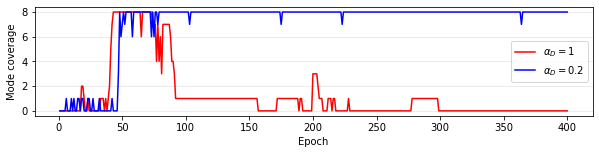

In [33]:
epochs = list(range(1,401))

seed8_vanilla = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 5, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 4, 7, 4, 6, 3, 7, 7, 7, 7, 7, 7, 6, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
seed8_alpha = [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 8, 6, 7, 8, 7, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

plt.figure(figsize=(10,2))

plt.plot(epochs, seed8_vanilla, color='red', label=r'$\alpha_{D} = 1$')
plt.plot(epochs, seed8_alpha, color='blue', label=r'$\alpha_{D} = 0.2$')

plt.grid(axis='y', color=(0.9,0.9,0.9))
plt.ylabel('Mode coverage')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.show()



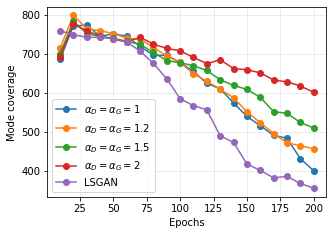

In [4]:
index=0
metric = ['Modes', 'FIDs'][index]

data = []

for i in range(20):
    df = pd.read_csv('metrics/mnist_metrics_epochs_fid.csv')
    df[metric] = df[metric].apply(lambda x: eval(x)[i])
    data.append(list(df.groupby('Setting')[metric].mean()))

data = np.array(data)

epochs = [10*i for i in range(1,21)]

plt.figure(figsize=(5,3.5))

plt.grid(color=(0.9,0.9,0.9))

plt.plot(epochs, data[:,0], marker='o', label=r'$\alpha_{D} = \alpha_{G} = 1$')
plt.plot(epochs, data[:,2], marker='o', label=r'$\alpha_{D} = \alpha_{G} = 1.2$')
plt.plot(epochs, data[:,3], marker='o', label=r'$\alpha_{D} = \alpha_{G} = 1.5$')
plt.plot(epochs, data[:,4], marker='o', label=r'$\alpha_{D} = \alpha_{G} = 2$')
plt.plot(epochs, data[:,1], marker='o', label='LSGAN')

plt.ylabel(['Mode coverage', 'FID'][index])
plt.xlabel('Epochs')

plt.legend()
plt.savefig('stacked_epochs_' + ['modes', 'fid'][index] + '.pdf')
plt.show()

In [64]:
def make_polar():

    means = [np.array([np.cos(2 * np.pi * i / 8), np.sin(2 * np.pi * i / 8)]) for i in range(1,9)]
    stds = [np.sqrt(1e-4)] * 8
    modes = list(zip(means, stds))

    probs = np.array([1 for m in range(8)])
    probs = list(probs / probs.sum())

    return modes, probs

def get_data(data_size, modes, probs):

    indices = np.random.choice(len(modes), data_size, p=probs)

    data = [modes[i][0] + modes[i][1] * np.random.randn(2) for i in indices]

    return data

modes, probs = make_polar()

data = get_data(25000, modes, probs)
data = np.concatenate([d.reshape(1,-1) for d in data], axis=0)

In [65]:
data.shape

(25000, 2)

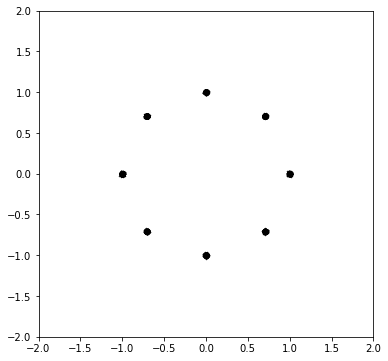

In [67]:
plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:,1], c=[(0,0,0)], s=0.2)
interval = [-2, 2]
plt.xlim(interval)
plt.ylim(interval)
plt.show()

In [70]:
import torch
from torchvision import datasets, transforms

def make_stacks(data, data_size):
    data = torch.concat(data, dim=0)
    stacked_data = data[torch.randint(data.shape[0], (data_size * 3,))]
    stacked_data = stacked_data.reshape(data_size, 3, data.shape[1], data.shape[2])
    return [stacked_data[i, :, :, :] for i in range(data_size)]

transform_data = transforms.Compose([transforms.ToTensor()])

data = [x for x, _ in list(datasets.MNIST('data', download=True, train=True, transform=transform_data))]
data = make_stacks(data, 3)

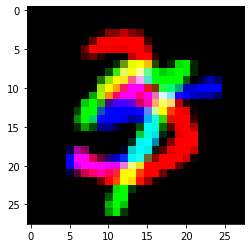

In [77]:
plt.imshow(np.array(data[2]).transpose(1,2,0))
plt.show()

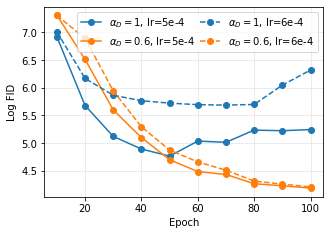

In [357]:
data_idx = 0
ls_gan = False

df = pd.read_csv('metrics/' + ['celeba', 'lsun'][data_idx] + '_metrics_final.csv')

lr_names = [['5e-4', '6e-4'], ['1e-4', '2e-4']][data_idx]
lrs = [eval(lr) for lr in lr_names]
gans = [r'$\alpha_{D} = 1$', r'$\alpha_{D} = 0.6$'] + (['LSGAN'] if ls_gan else [])
slices = [(df['d_alpha'] == 1) & (df['ls_gan'] == False), df['d_alpha'] == 0.6] + ([df['ls_gan'] == True] if ls_gan else [])

n = 10

data = np.zeros((len(slices), len(lrs),n))

metric = 'fid_scores'

for fid_i in range(n):
    df['FID_i'] = df['fid_scores'].apply(lambda x: eval(x)[fid_i])
    for j, s in enumerate(slices):
        fids = df[s].groupby('lr').mean()['FID_i']
        for k, lr in enumerate(lrs):
            data[j, k, fid_i] = fids[lr]

data = np.log(data)          
            
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

plt.figure(figsize=(5,3.5))

styles = ['-', '--']
            
for i in range(len(lr_names)):
    for j in range(len(gans)):
        plt.plot([10*k for k in range(1,n+1)], data[j,i,:], label=gans[j] + ', lr=' + lr_names[i], 
                             linestyle=styles[i], marker='.', color=colors[j], markersize=12)

plt.legend(ncol=2, fontsize=10, columnspacing=0.5, loc=['upper right', (0.13,0.46)][data_idx])
plt.xlabel('Epoch')
plt.ylabel('Log FID')
plt.grid( color=(0.9,0.9,0.9))
plt.savefig('fid_epochs_' + ['celeba', 'lsun'][data_idx] + ('_nolsgan' if not ls_gan else '') + '.pdf', bbox_inches='tight')
plt.show()

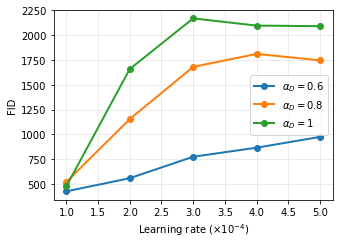

In [21]:
data_idx = 1
ls_gan = False
no_5 = False
less_alphas = True

df = pd.read_csv('metrics/' + ['celeba', 'lsun'][data_idx] + '_metrics_final.csv')

df['FID-100'] = df['fid_scores'].apply(lambda x: eval(x)[9])

plt.figure(figsize=(5,3.5))

alphas = [0.6,0.8,1] if less_alphas else ([] if no_5 else [0.5]) + [0.6,0.7,0.8,0.9,1.0]

for i, da in enumerate(alphas):
    
    data = df[(df['d_alpha'] == da) & (df['ls_gan'] == False)].groupby('lr')['FID-100'].mean()
    x = np.array(data.index)
    y = np.array(data)
    plt.plot(x*10000,y, label=r'$\alpha_{D} = ' + str(da) + r'$', marker='.', linewidth=2, markersize=12, linestyle='-')

if ls_gan:
    data = df[df['ls_gan'] == True].groupby('lr')['FID-100'].mean()
    x = np.array(data.index)
    y = np.array(data)
    plt.plot(x * 10000,y, label='LSGAN', marker='.', linewidth=2, markersize=12, linestyle='-')

plt.legend()
plt.xlabel(r'Learning rate ($\times 10^{-4}$)')
plt.ylabel('FID')
plt.grid( color=(0.9,0.9,0.9))
plt.savefig('fid_lr_' + ['celeba', 'lsun'][data_idx] 
            + ('_lessalphas' if not ls_gan else '') + ('_nolsgan' if not ls_gan else '') 
            + ('_no0.5' if no_5 else '') + '.pdf', bbox_inches='tight')
plt.show()